In [1]:
# Importo le librerie necessarie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [2]:
# Carico i dataset in formato csv
df_building = pd.read_csv('building.csv', sep=',', encoding='cp1252');
df_group = pd.read_csv('group.csv', sep=',', encoding='cp1252')
df_log = pd.read_csv('log2.csv', sep=';', encoding='cp1252')

### Dataset "building.csv"

In [3]:
# Visualizzo il contenuto del dataset "df_building"
df_building.head()

,Id,Nome,Ip,TabStorico
0,1,Edificio1,10.2.1.142,LogEdificioUno
1,2,Edificio2,10.2.3.254,LogEdificioDue
2,5,Edificio3,10.2.3.22,LogEdificioTre
3,6,Villa,10.2.3.14,LogVilla


In [13]:
# Informazioni principali sul dataset df_building
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Id            4 non-null int64
Nome          4 non-null object
Ip            4 non-null object
TabStorico    4 non-null object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


### Dataset "group.csv"

In [8]:
# Visualizzo il contenuto del dataset "df_group"
df_group.head(10)

,Id,IdBuilding,GroupAddress,DataPoint,ValueType,Description
0,1,1,2/0/0,9.000,ppm,C1/0/M101 CO2
1,2,1,2/0/1,9.000,ppm,C1/0/M102 CO2
2,3,1,2/1/0,9.000,ppm,C1/0/U101 C02
3,4,1,2/1/1,9.000,ppm,C1/0/U105 C02
4,5,1,2/0/4,9.000,C°,C1/0/M101 TEMP
5,6,1,2/0/5,9.000,C°,C1/0/M102 TEMP
6,7,1,2/1/9,9.000,C°,C1/0/U101 Temperatura
7,8,1,2/1/10,9.000,C°,C1/0/U105 Temperatura
8,9,1,2/0/2,5.001,%,C1/0/M101 Umidità
9,10,1,2/0/3,5.001,%,C1/0/M102 Umidità


In [14]:
# Informazioni principali sul dataset df_group
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
Id              54 non-null int64
IdBuilding      54 non-null int64
GroupAddress    54 non-null object
DataPoint       54 non-null float64
ValueType       54 non-null object
Description     54 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ KB


In [11]:
# Esploro la colonna "ValueType" per individuare in quali unità di misura vengono forniti i segnali dal set di sensori
# installati nel campus
df_group['ValueType'].unique()

array(['ppm', 'C°', '%', 'W', 'Wh', 'bool'], dtype=object)

In [17]:
# Conto quanti sensori sono presenti per ogni unità di misura di cui si effettua una rilevazione
df_group['ValueType'].value_counts()

Wh      15
bool     9
W        9
C°       9
ppm      6
%        6
Name: ValueType, dtype: int64

In [18]:
# Conto il numero di sensori presenti in ciascun building del campus
df_group['IdBuilding'].value_counts()

1    25
5    23
6     6
Name: IdBuilding, dtype: int64

### Dataset "log2.csv"

In [19]:
# Visualizzo il contenuto del dataset "df_log"
df_log.head()

,Data,IdBuilding,IndividualAddress,GroupAddress,TelegramType,Value,ValueType,Description
0,2019-02-22 12:27:53.3233333,1.0,3.1.6,2/2/0,write,-33429.7,W,Produzione totale fotovoltaico
1,2019-02-22 12:28:56.4000000,1.0,3.1.201,2/0/3,write,35.68625,%,C1/0/M102 Umidità
2,2019-02-22 12:29:37.1766667,1.0,3.2.202,2/0/0,write,400.96,ppm,C1/0/M101 CO2
3,2019-02-22 12:30:21.9333333,1.0,3.3.201,2/1/8,write,36.86272,%,C1/0/U105 Umidità
4,2019-02-22 12:31:23.4800000,1.0,3.3.202,2/1/0,write,536.96,ppm,C1/0/U101 C02


In [20]:
# Informazioni principali sul dataset df_log
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538829 entries, 0 to 538828
Data columns (total 8 columns):
Data                 538829 non-null object
IdBuilding           538828 non-null float64
IndividualAddress    538828 non-null object
GroupAddress         538828 non-null object
TelegramType         538828 non-null object
Value                538828 non-null object
ValueType            538828 non-null object
Description          538828 non-null object
dtypes: float64(1), object(7)
memory usage: 32.9+ MB


In [22]:
# Verifico quali unità di misura vengono rilevate nel log (per confronto con dataset df_group)
df_log['ValueType'].unique()

array(['W', '%', 'ppm', 'C°', 'Wh', 'bool', nan], dtype=object)

In [23]:
# Verifico in quali building del campus vengono rilevate le misure (per confronto con dataset df_group)
df_log['IdBuilding'].unique()

array([ 1.,  5., nan])

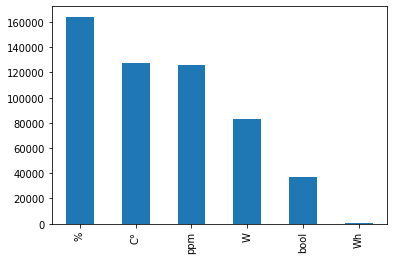

In [32]:
# Visualizzo graficamente quante rilevazioni sono presenti per ciascuna unità di misura
df_log['ValueType'].value_counts().plot(kind="bar")

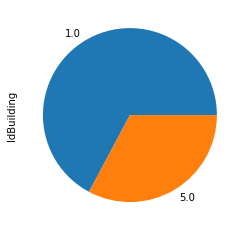

In [33]:
# Visualizzo graficamente la proporzione di rilevazioni per ciascun building del campus
df_log['IdBuilding'].value_counts().plot(kind='pie')

In [34]:
# Conto quante rilevazioni sono presenti per ciascun sensore installato
df_log['Description'].value_counts()

C1/0/M102 Umidità                          35096
C1/0/M101 Umidità                          26883
C1/0/U101 Umidità                          26213
C1/0/U105 Umidità                          25854
C3/0/U306 Rel. humidity                    25142
C3/0/U301 Rel. humidity                    25003
C1/0/U105 Temperatura                      21388
C3/0/U301 Temperature                      21352
C1/0/M102 TEMP                             21300
C3/0/U306 Temperature                      21268
C1/0/M101 TEMP                             21254
C1/0/U101 Temperatura                      21197
C1/0/U105 C02                              21138
C1/0/U101 C02                              21033
C1/0/M102 CO2                              21017
C3/0/U301 CO2                              20936
C3/0/U306 CO2                              20935
C1/0/M101 CO2                              20888
Produzione totale fotovoltaico             20813
Produzione totale Fotovoltaico Palestra    20776
Produzione totale Fo

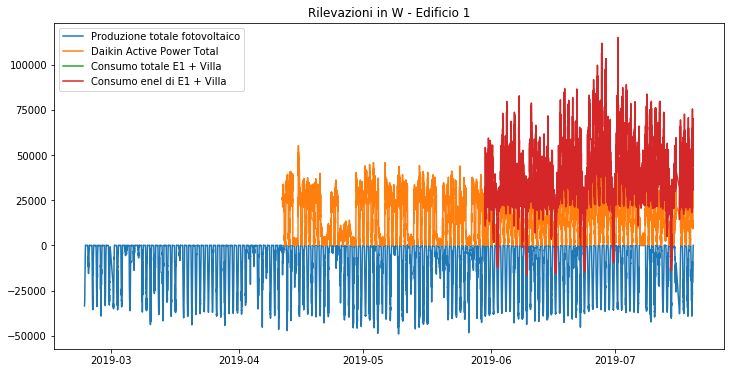

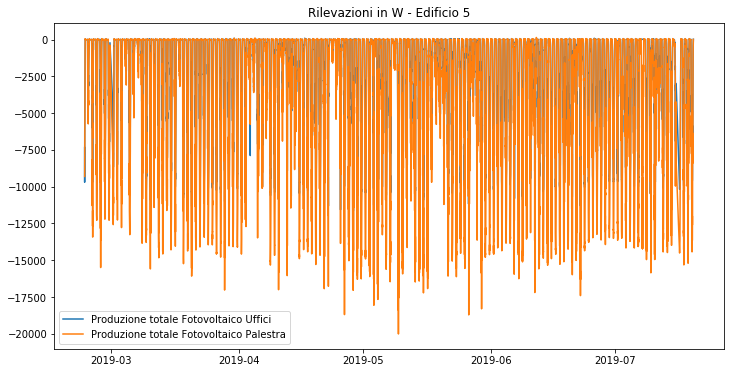

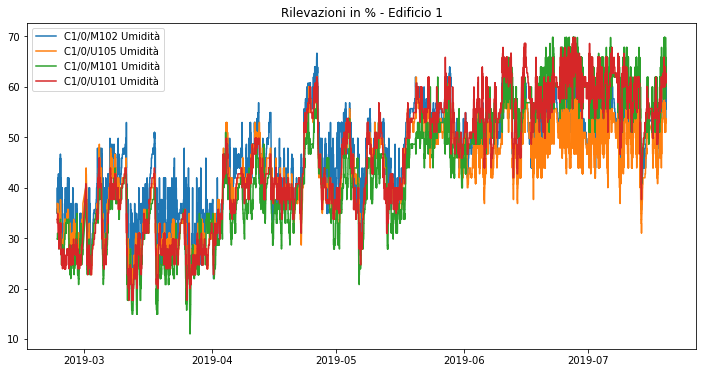

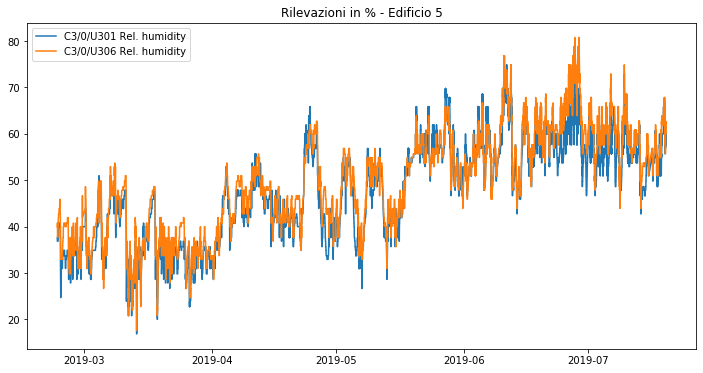

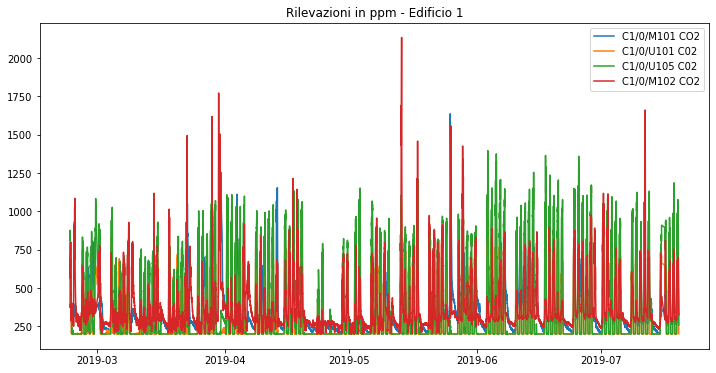

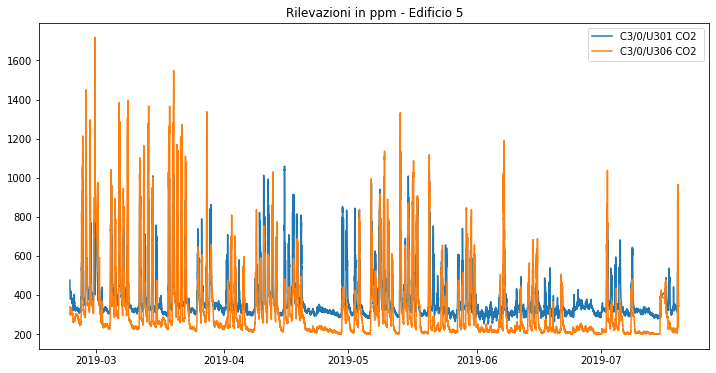

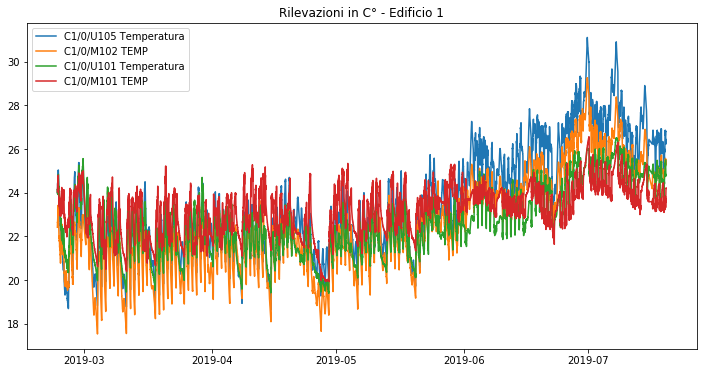

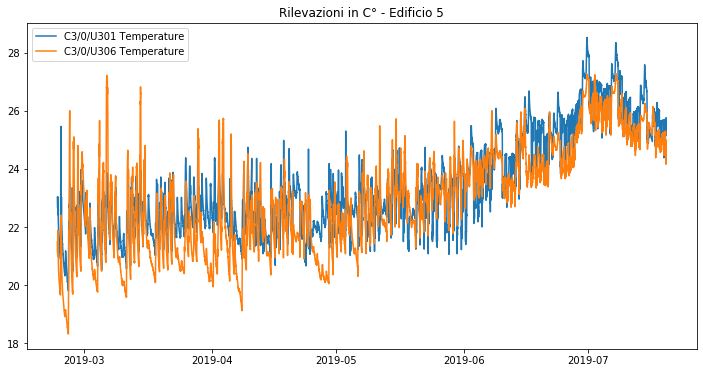

No handles with labels found to put in legend.


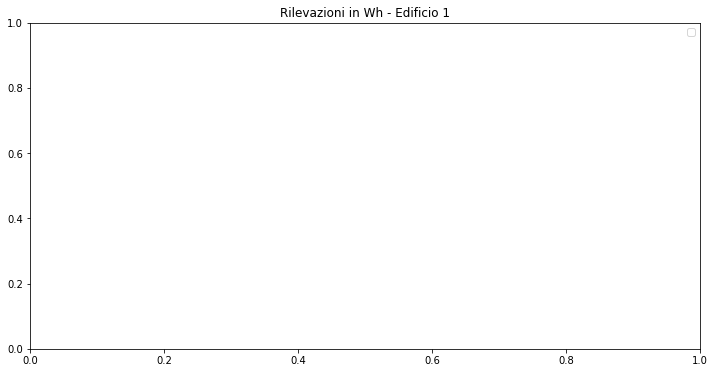

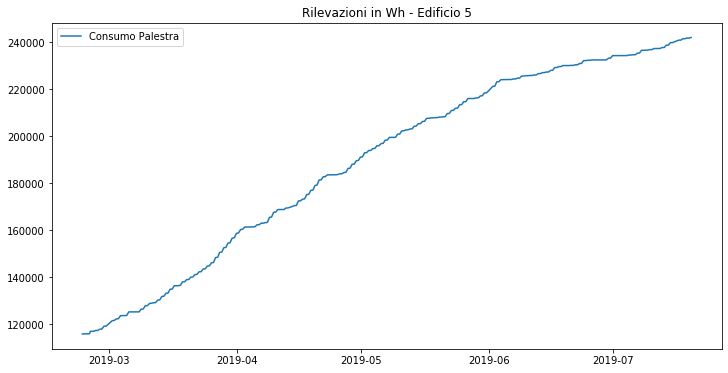

In [37]:
# Visualizzo le serie storiche delle rilevazioni di ciascun sensore installato, raggruppando i plot per unitò di misura e
# building

df_log.dropna(inplace = True) # elimino i record con dati mancanti
df_log = df_log[df_log['ValueType'] != 'bool'] # elimino le misurazioni booleane

# converto in formato datetime la colonna 'Data' e in formato numerico la colonna 'Value'
df_log['Data'] = pd.to_datetime(df_log['Data'])
df_log["Value"] = pd.to_numeric(np.char.replace(df_log['Value'].to_numpy().astype(str),',','.'))

for v_type in df_log['ValueType'].unique():
    
    for id_b in df_log['IdBuilding'].unique():
        subset = df_log[(df_log['ValueType'] == v_type) & (df_log['IdBuilding'] == id_b)]
        [['Data','Value', 'Description']]
        
        plt.figure(figsize = (12,6))
        
        for desc in subset['Description'].unique():
            plot_label = desc;
            
            plt.plot(subset[subset['Description'] == desc]['Data'], 
                     subset[subset['Description'] == desc]['Value'], 
                     label = plot_label)
                
        
        plt.title('Rilevazioni in ' + str(v_type) + ' - Edificio ' + str(int(id_b)))
        plt.legend()
        plt.show()